# Análisis de componentes principales (PCA)

[Fuente](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

Cuando nos enfrentamos a un gran conjunto de variables correlacionadas, las componentes principales nos permiten resumir este conjunto con un número menor de variables que explican colectivamente la mayor parte de la variabilidad del conjunto original. 

Las direcciones de las componentes principales pueden tomarse como direcciones en el espacio de características a lo largo de las cuales los datos originales son muy variables.

### Introducción

El análisis de componentes principales se refiere al proceso mediante el cual estas se calculan y su uso posterior para comprender los datos. 

Es un enfoque no supervisado, ya que involucra solo un conjunto de características $X_1, X_2, ..., X_n$ y ninguna respuesta asociada. 

Además de producir variables derivadas para su uso en problemas de aprendizaje supervisado, este método también sirve como una herramienta para la visualización de datos.


## Ejemplo 
Vamos a ver el impacto que tiene el uso de esta técnica en un conjunto de datos aparentemente simple como el de Iris.

In [20]:
# Carga de las librerias necesarias

import sklearn.datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline  

In [2]:
# Carga de datos 

iris = sklearn.datasets.load_iris()

print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [3]:
X = iris.data
print(X.shape)
y = iris.target
target_names = iris.target_names


(150, 4)


**Vamos a realizar varias visualizaciones de los datos para ver su distribución**

Usaremos la libreria *Seaborn* que nos ofrece la función *pairplot*.

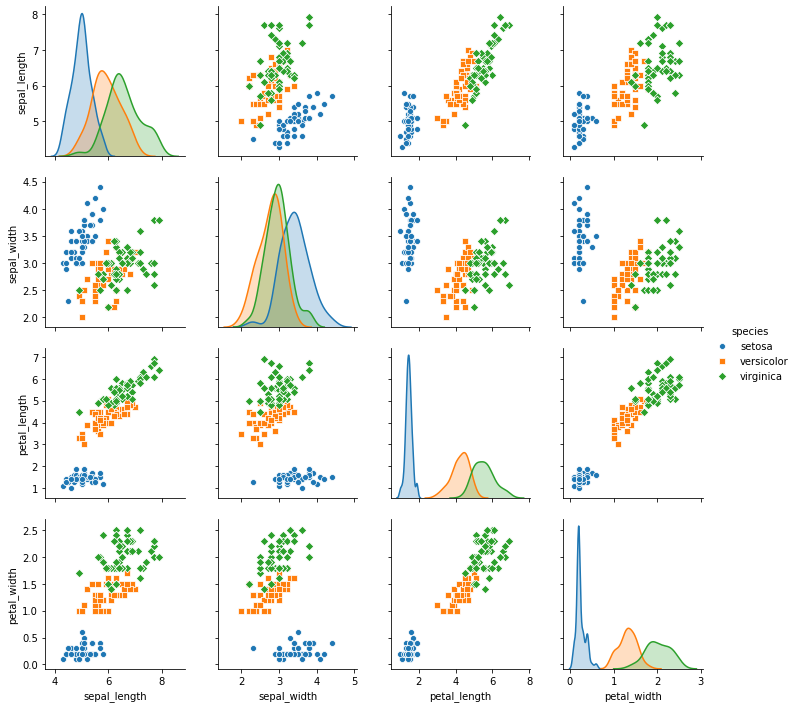

In [2]:
import seaborn as sns

viz = sns.load_dataset("iris")

g = sns.pairplot(viz, hue="species", markers=["o", "s", "D"])

**Cómo sería de grande este *plot* si el número de dimensiones fuera 10?**

Ahora realizaremos una visualización del conjunto de datos realizando una reducción de dimensionalidad para poder comparar con la visualización anterior.

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X_r = pca.transform(X)


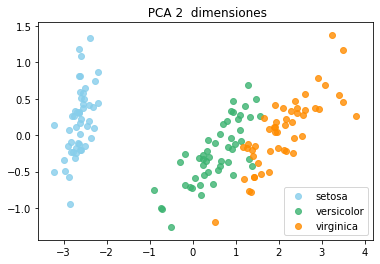

In [6]:
plt.figure()

colors = ['skyblue', 'mediumseagreen', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best')
plt.title(' PCA 2  dimensiones');

### Conclusión

Hemos reducido la dimensionalidad del conjunto de datos y ahora somos capaces de realizar una única representación de los datos y obtener una idea de su organización. 

PCA proporciona una herramienta para hacer precisamente esto. Encuentra una representación de baja dimensión de un conjunto de datos que contiene la mayor cantidad posible de la variación.

Después de que se haya determinado la primera componente principal $Z_1$, podemos encontrar la segunda componente principal $Z_2$. La segunda componente principal es la combinación lineal de $X_1, ..., X_p$ que tiene la máxima varianza de todas las combinaciones lineales que no están correlacionadas con Z1.

La segunda componente principal  $z_{12}, z_{22}, ..., z_{n2}$ toma la forma:  
$z_{i2}=φ_{12}x_{i1}+φ_{22}x_{i2}+...+φ_{p2}x_{ip}$, donde $φ2$ es el segundo vector de carga de componentes principales, con elementos $φ_{12}, φ_{22}, ..., φ_{p2}$. Resulta que restringir Z2 para que no esté correlacionado con Z1 es equivalente a restringir la dirección de $φ2$ para que sea ortogonal  a la dirección de φ1.

5.843333333333335 3.057333333333334


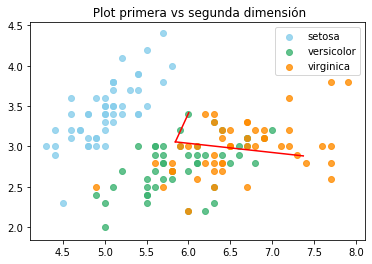

In [94]:
plt.figure()

colors = ['skyblue', 'mediumseagreen', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, 
                label=target_name)

plt.plot([pca.mean_[0], pca.mean_[0] + (pca.explained_variance_[0]*pca.components_[0][0])],[pca.mean_[1], pca.mean_[1] + (np.sqrt(pca.explained_variance_[0])*pca.components_[0][1])],'-',c='r')    
plt.plot([pca.mean_[0], pca.mean_[0] + (pca.explained_variance_[1]*pca.components_[1][0])],[pca.mean_[1], pca.mean_[1] + (np.sqrt(pca.explained_variance_[1])*pca.components_[1][1])],'-', c='r')    

plt.legend(loc='best')
plt.title(' Plot primera vs segunda dimensión');
print(pca.mean_[0], pca.mean_[1]);


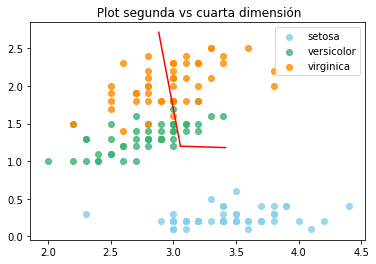

In [93]:
plt.figure()

colors = ['skyblue', 'mediumseagreen', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 1], X[y == i, 3], color=color, alpha=.8, 
                label=target_name)

plt.plot([pca.mean_[1], pca.mean_[1] + (np.sqrt(pca.explained_variance_[0])*pca.components_[0][1])],[pca.mean_[3], pca.mean_[3] + (pca.explained_variance_[0]*pca.components_[0][3])],'-',c='r')    
plt.plot([pca.mean_[1], pca.mean_[1] + (np.sqrt(pca.explained_variance_[1])*pca.components_[1][1])],[pca.mean_[3], pca.mean_[3] + (pca.explained_variance_[1]*pca.components_[1][3])],'-', c='r')    

plt.legend(loc='best')
plt.title(' Plot segunda vs cuarta dimensión');